# Health Insurance Cross Sell Prediction

**Context**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

**Objective**


**Predictive Analytics**<br>

- Determine the criteria for customers who will be offered vehicle insurance based on the available *features*<br>

-------------

---

# Import Package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
Insurance = pd.read_csv('train.csv')

In [3]:
Insurance.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [4]:
Insurance.info()
Insurance.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


(381109, 12)

*data insurance had 12 columns and 381,108 sample rows*

---

### Change Feature Column

In [7]:
# Change data type Region_Code , Policy_Sales_Channel, Annual Premium into integer

Insurance.Region_Code = Insurance.Region_Code.astype('int')
Insurance.Policy_Sales_Channel = Insurance.Policy_Sales_Channel.astype('int')
Insurance.Response = Insurance.Response.astype('int')

---

# Describing Data

In [8]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  int32  
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  int32  
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 30.5+ MB


In [9]:
# Checking value counts for numerical columns
for col in Insurance.columns:
    if Insurance[col].dtype == 'int' or Insurance[col].dtype == 'int64' or Insurance[col].dtype == 'float64':
        print(col,":",Insurance[col].nunique())

id : 381109
Age : 66
Driving_License : 2
Region_Code : 53
Previously_Insured : 2
Annual_Premium : 48838
Policy_Sales_Channel : 155
Vintage : 290
Response : 2


In [10]:
data_num = Insurance.select_dtypes(include=['int64', 'float64'])
data_cat = Insurance.select_dtypes(include=['int','object'])
data_num.columns,data_cat.columns 

(Index(['id', 'Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium',
        'Vintage'],
       dtype='object'),
 Index(['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage',
        'Policy_Sales_Channel', 'Response'],
       dtype='object'))

---

#### Descriptive Statistics

In [11]:
# numerical data object
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0


In [12]:
#categorical data object
data_cat.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


#### Mode

In [13]:
Insurance.mode().iloc[0].reset_index(name= 'Mode')

,index,Mode
0,id,1
1,Gender,Male
2,Age,24.0
3,Driving_License,1.0
4,Region_Code,28.0
5,Previously_Insured,0.0
6,Vehicle_Age,1-2 Year
7,Vehicle_Damage,Yes
8,Annual_Premium,2630.0
9,Policy_Sales_Channel,152.0


#### Variance

In [14]:
Insurance.var()

id                      1.210370e+10
Age                     2.406101e+02
Driving_License         2.126090e-03
Region_Code             1.750299e+02
Previously_Insured      2.482543e-01
Annual_Premium          2.962927e+08
Policy_Sales_Channel    2.938073e+03
Vintage                 7.000887e+03
Response                1.075419e-01
dtype: float64

#### Standard Deviation

In [15]:
np.sqrt(Insurance.var())

id                      110016.836208
Age                         15.511611
Driving_License              0.046110
Region_Code                 13.229888
Previously_Insured           0.498251
Annual_Premium           17213.155057
Policy_Sales_Channel        54.203995
Vintage                     83.671304
Response                     0.327936
dtype: float64

#### InterQuartileRange (IQR)

In [16]:
print('Inter Quartile Range (IQR):')
data_num.quantile(0.75)-data_num.quantile(0.25)

Inter Quartile Range (IQR):


id                    190554.0
Age                       24.0
Driving_License            0.0
Previously_Insured         1.0
Annual_Premium         14995.0
Vintage                  145.0
dtype: float64

---

# EDA ( Exploratory Data Analysis )

## Visualizing Data 

---

Wall time: 25min 4s


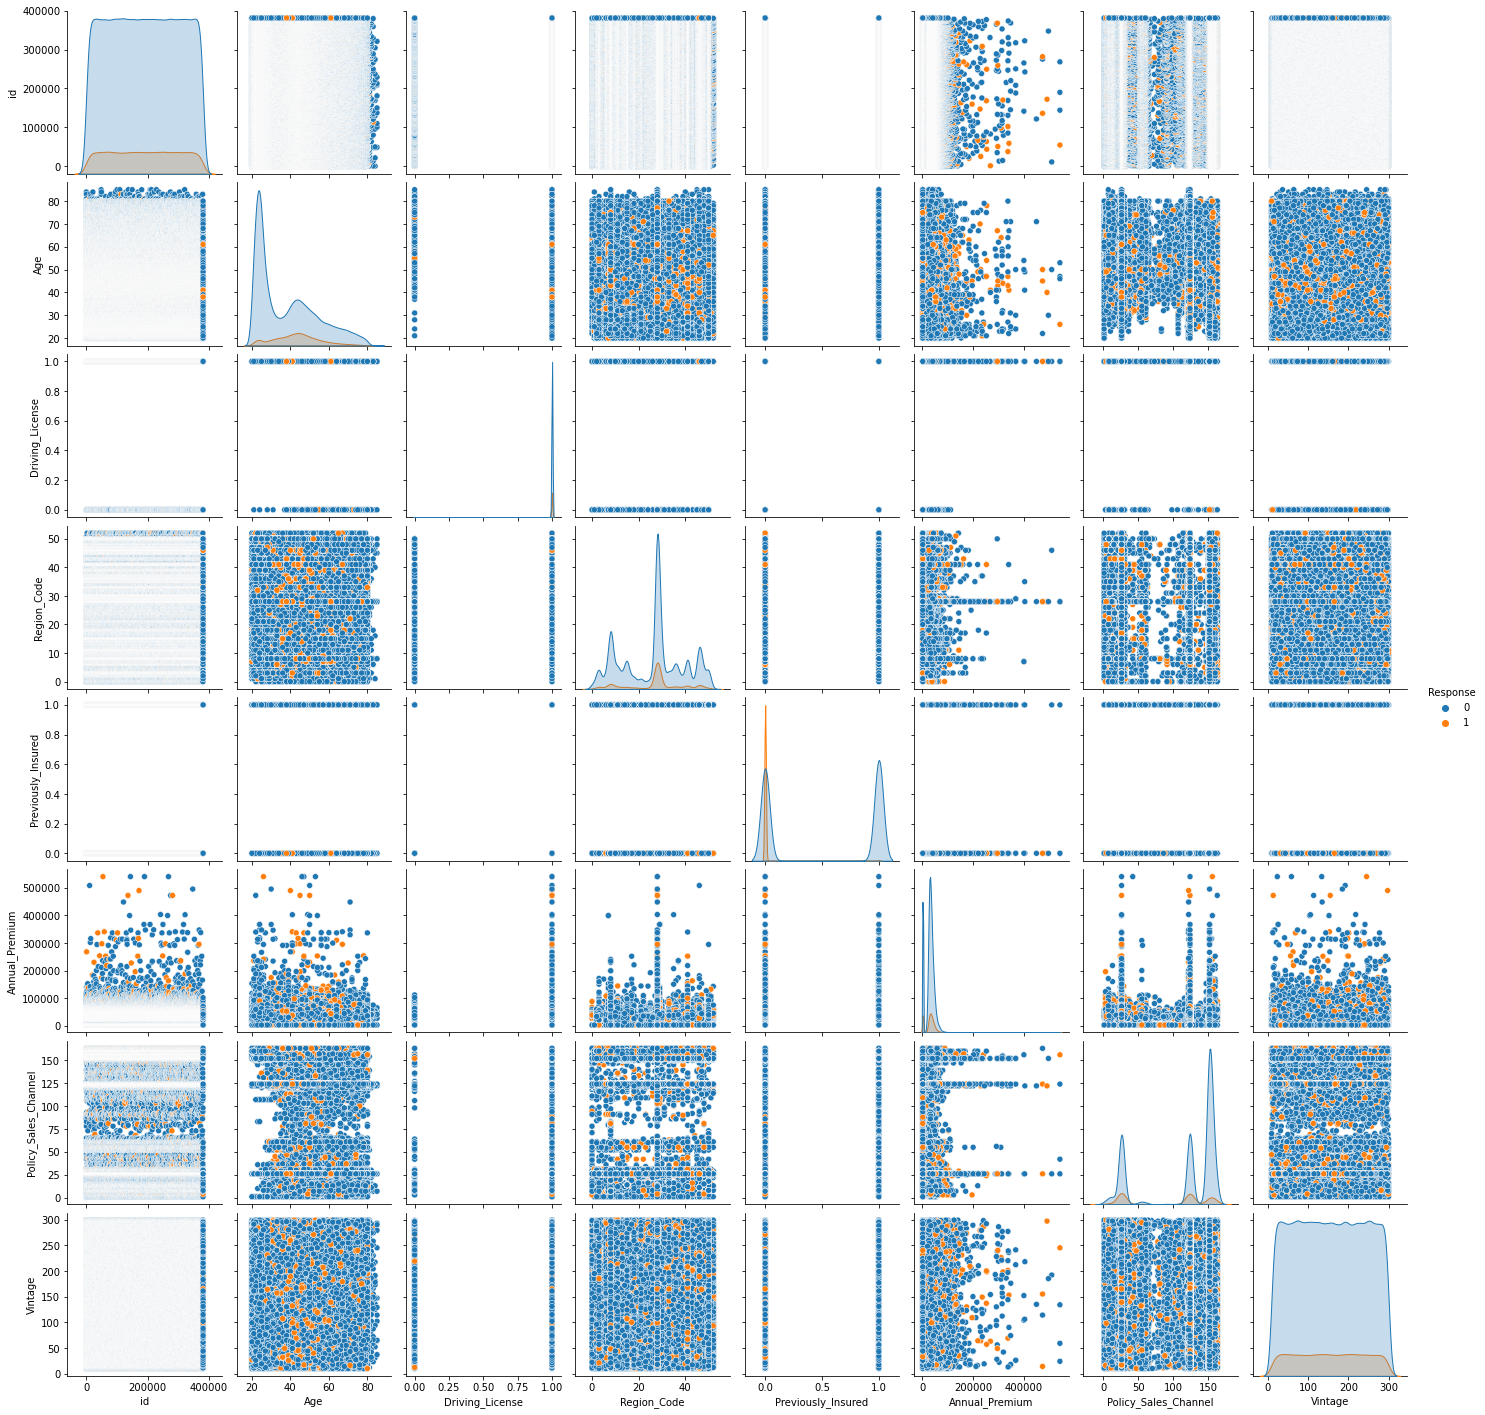

In [17]:
%%time
sns.pairplot(Insurance, hue='Response')


**Insight**

in the plot above, the blue dot (No Responses) dominates. and concludes that the majority of customers do not insure their vehicles

### Feature Numerical

<AxesSubplot:>

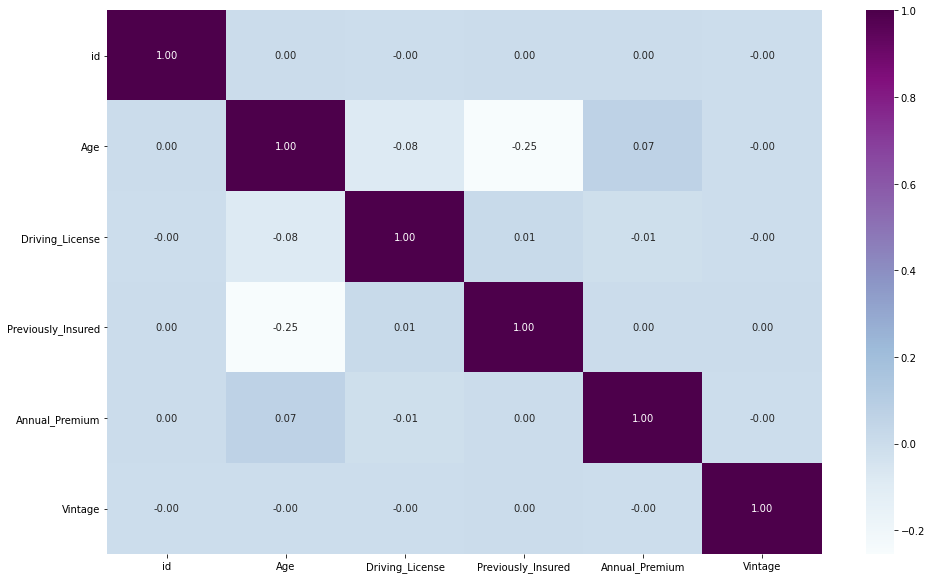

In [18]:
corr_= Insurance[data_num.columns].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

**Insight**

- Feature *Age* had negative correlation with *Previosly Insured* and positive correlation with *Annual Premium*
- Policy Sales Channel had negative correlation with *Age* and Positive correlation with *Previously_Insured*

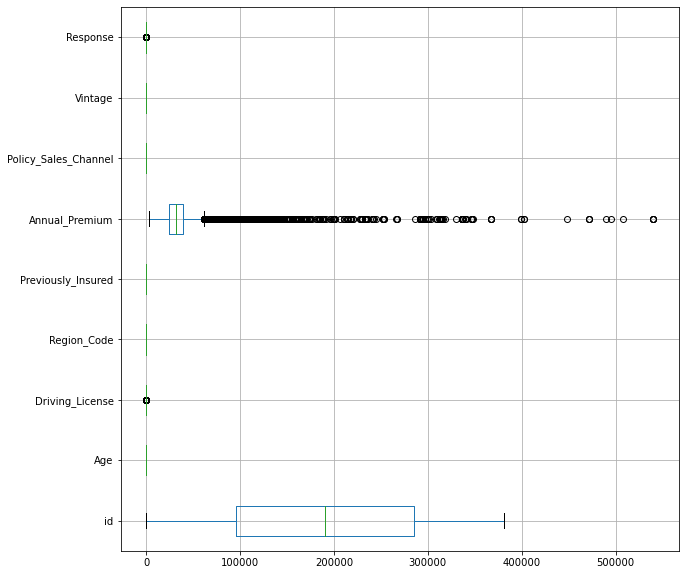

In [19]:
plt.figure(figsize=(10,10))
Insurance.boxplot(vert=0)
plt.show()

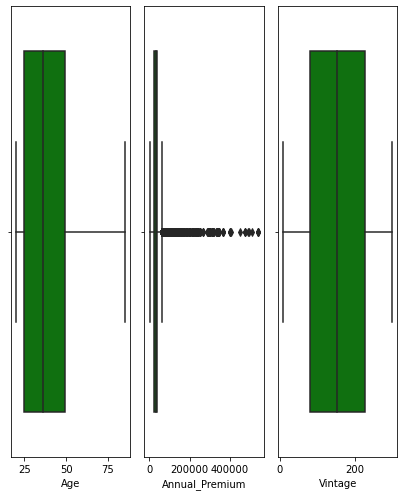

In [20]:
features_numeric = ['Age','Annual_Premium', 'Vintage']
plt.figure(figsize=(15,7))
for i in range(0, len(features_numeric)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(data_num[features_numeric[i]],color='green',orient='v')
    plt.tight_layout()


**Insight**

in the plot above, the Annual Premium had many outliers

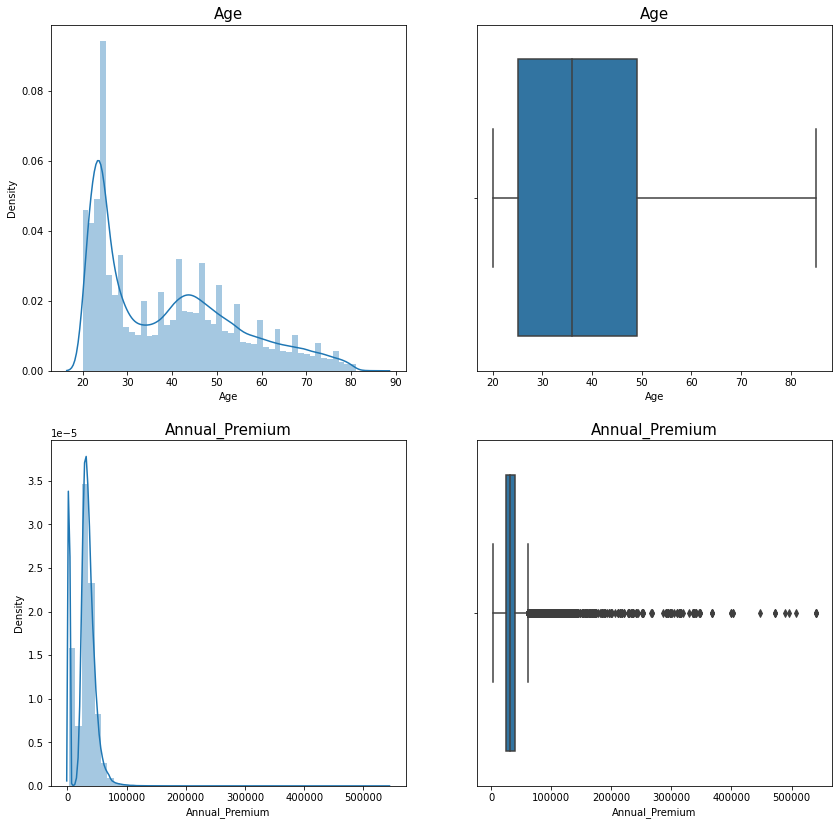

In [21]:
# Analyzing continuous variables
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14, 14)
a = sns.distplot(Insurance['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=15)
a = sns.boxplot(Insurance['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age",fontsize=15)

a = sns.distplot(Insurance['Annual_Premium'] , ax=axes[1][0])
a.set_title("Annual_Premium",fontsize=15)
a = sns.boxplot(Insurance['Annual_Premium'] , orient = "v" , ax=axes[1][1])
a.set_title("Annual_Premium",fontsize=15)
plt.show()

plt.show()

**Insight**
- Variable Age Lean on Right
- Variable Annual Premium had many outliers

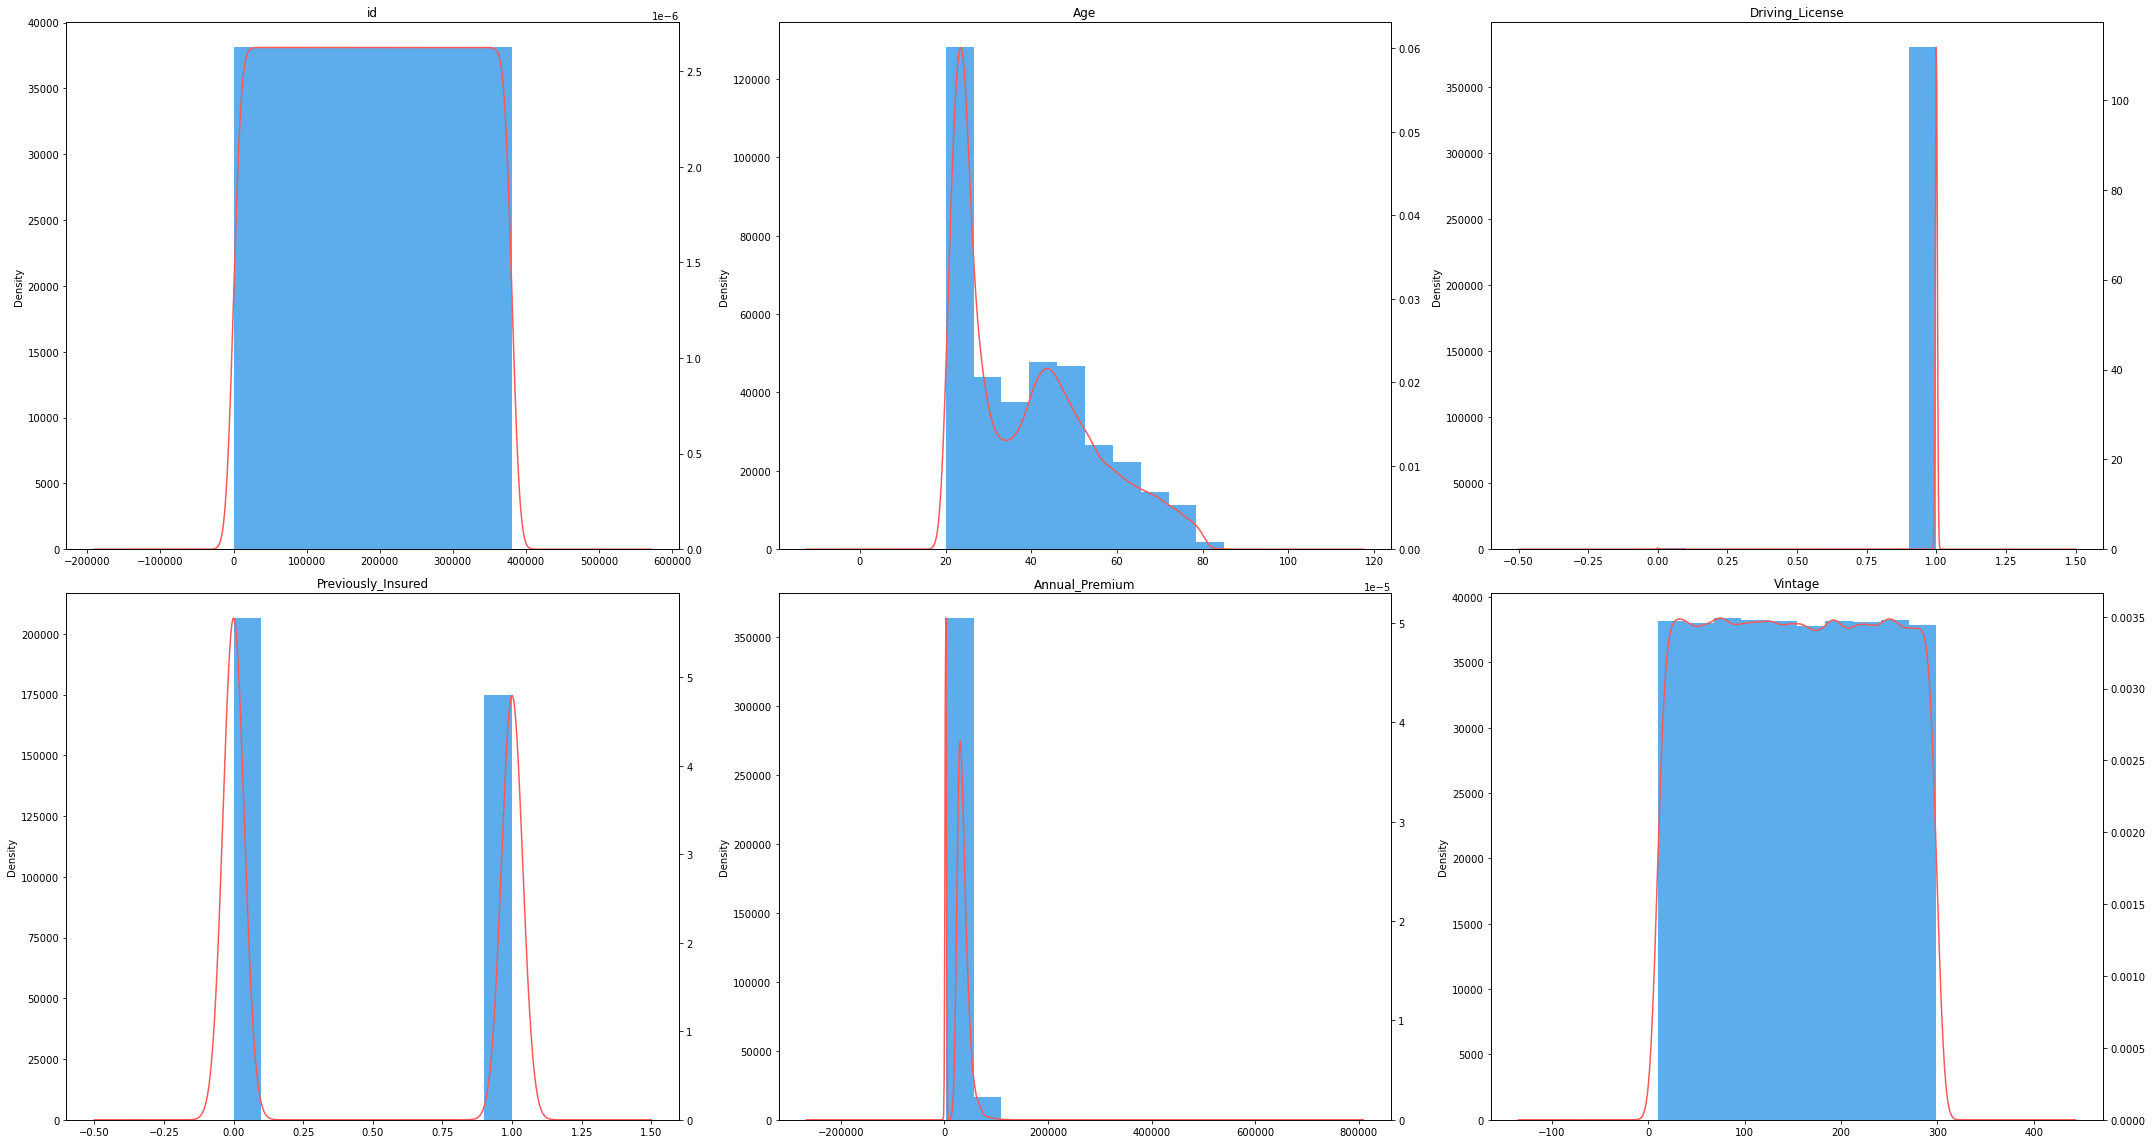

In [22]:
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 10, m * 8))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#5dadec')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='#ff5757')
    ax2.set_ylim(0)

fig.tight_layout()

### Feature Categorical

**Insight**
- Policy Sales Channel and Previously Insured had positive correlation
- Policy Sales Channel and Age had negative correlation

In [23]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

,feature,unique value
4,Policy_Sales_Channel,155
1,Region_Code,53
2,Vehicle_Age,3
0,Gender,2
3,Vehicle_Damage,2
5,Response,2


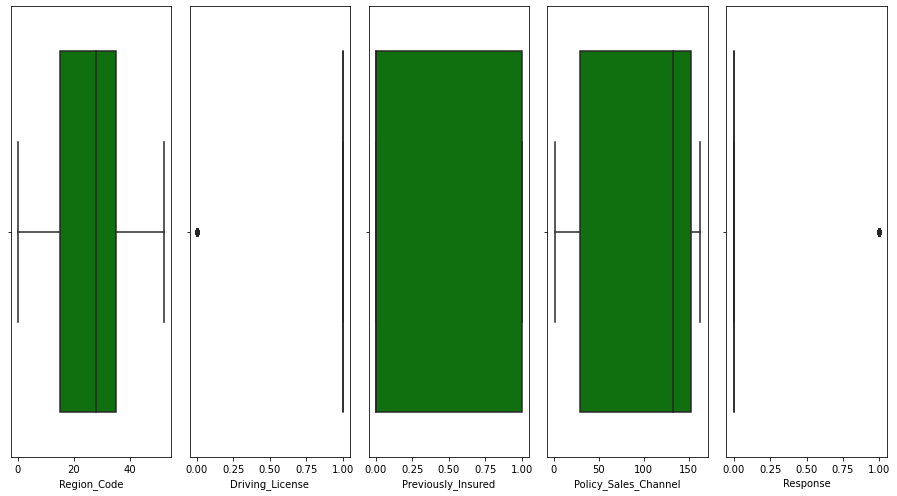

In [24]:
features_Cat = ['Region_Code','Driving_License', 'Previously_Insured','Policy_Sales_Channel','Response']
plt.figure(figsize=(15,7))
for i in range(0, len(features_Cat)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(Insurance[features_Cat[i]],color='green',orient='v')
    plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

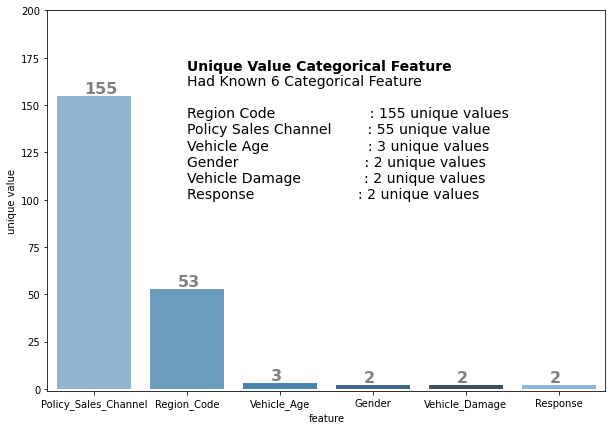

In [25]:
fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(x = 'feature',y='unique value',data=data_cat_unique,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=5, desat=1))

x = np.arange(len(data_cat_unique['feature']))
y = data_cat_unique['unique value']

for i, v in enumerate(y):
    ax.text(x[i]- 0.10
            , v+1.50
            ,
            str(v), fontsize = 16, color='gray', fontweight='bold')
    
title = '''
Unique Value Categorical Feature
'''
ax.text(1,160,title,horizontalalignment='left',color='black',fontsize=14,fontweight='bold')
    

text = '''
Had Known 6 Categorical Feature

Region Code                     : 155 unique values
Policy Sales Channel        : 55 unique value
Vehicle Age                      : 3 unique values
Gender                            : 2 unique values
Vehicle Damage              : 2 unique values
Response                       : 2 unique values


''' 
ax.text(1,75,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')
    
ax.set_ylim(-1,200)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

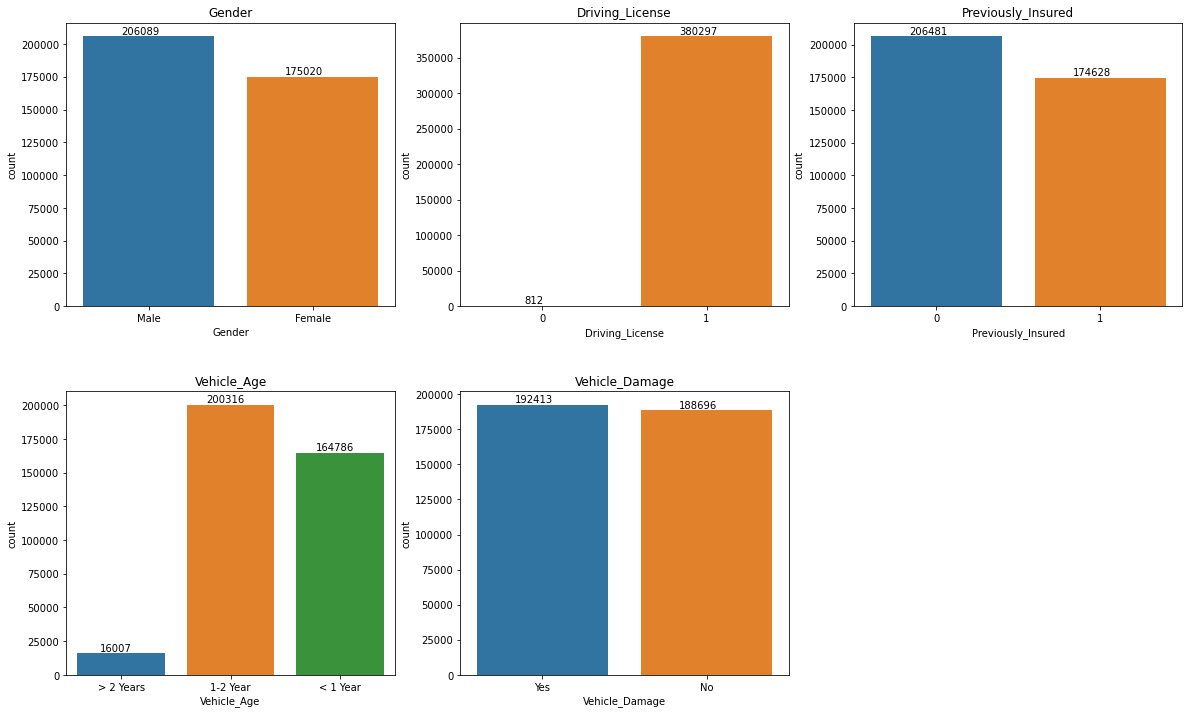

In [26]:
### Counts of Categorical variables
fig=plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace = .3, wspace=.2)
x = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    graph = sns.countplot(Insurance[x[i]])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

## Characteristic

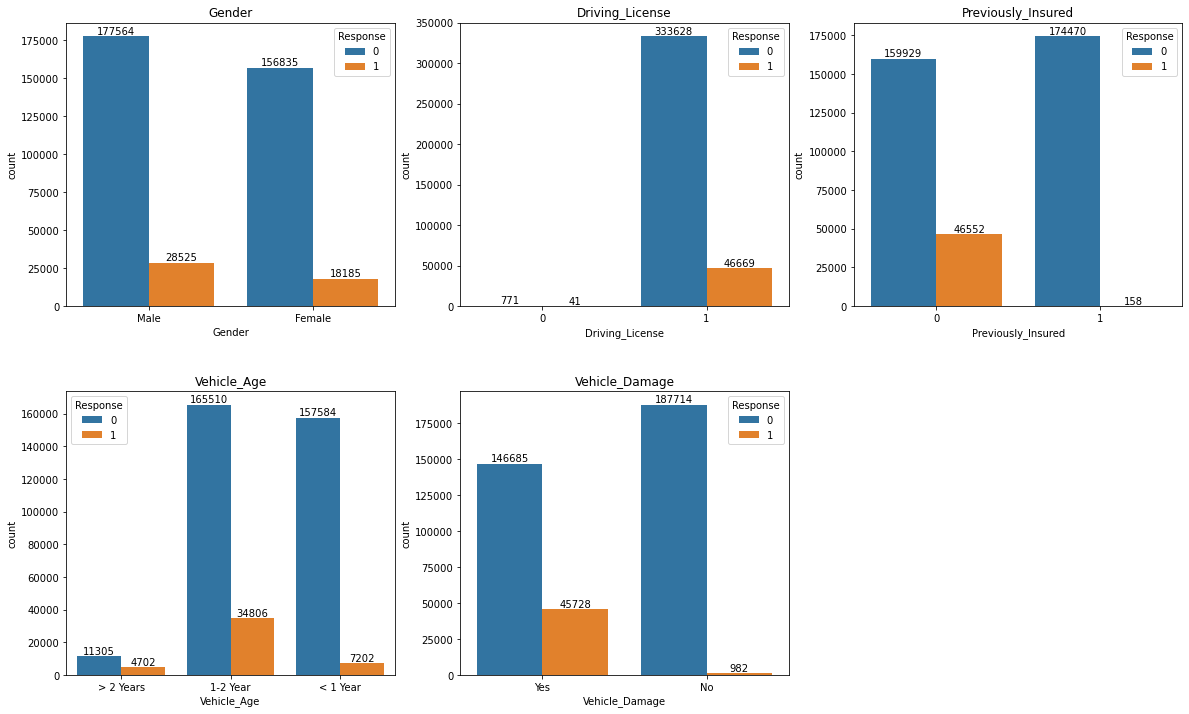

In [27]:
fig=plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace = .3, wspace=.2)
x = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    graph = sns.countplot(Insurance[x[i]],hue = Insurance['Response'])
    
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insight**
- Between 2 Gender seems have the same response to vehicle insurance
- Very few customers do not have a Driving License
- Almost no customers choose vehicle insurance if they are already insured
- Very few customers whose vehicles are > 2 years old
- Customers whose vehicles have not been damaged before do not seem interested in vehicle insurance

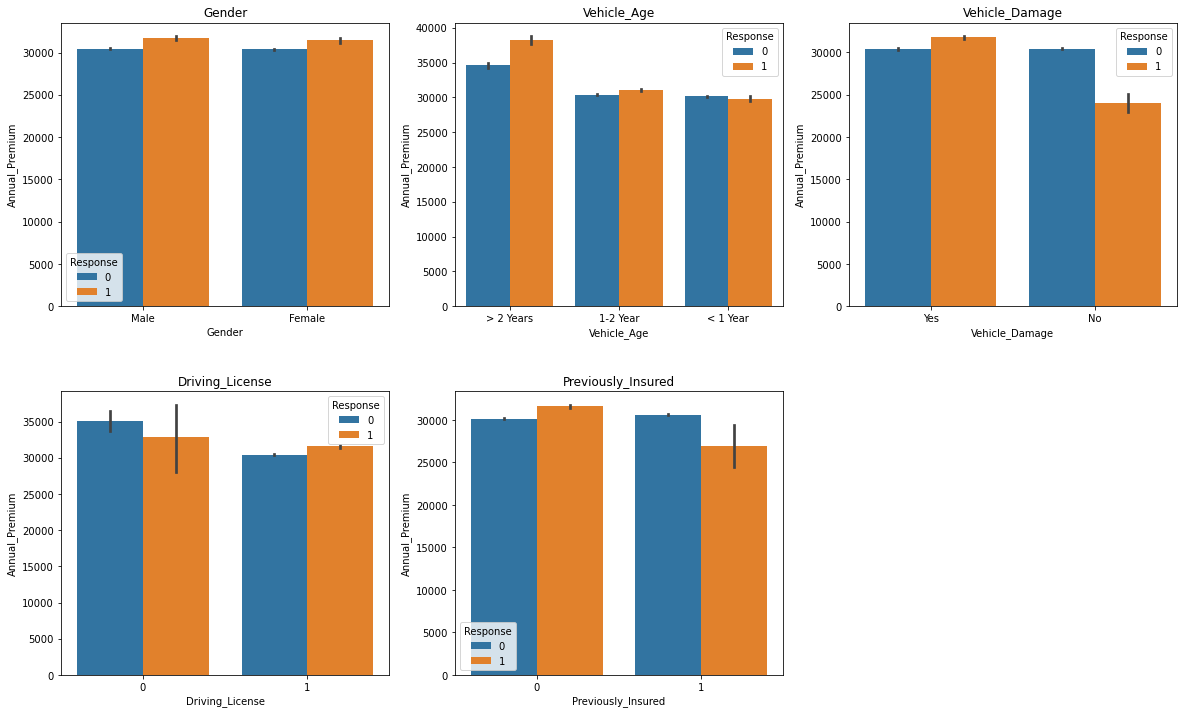

In [28]:
fig=plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace = .3, wspace=.2)
x = ['Gender','Vehicle_Age','Vehicle_Damage','Driving_License','Previously_Insured']
for i in range(0,len(x)):
    ax=fig.add_subplot(2,3,i+1).set_title(x[i])
    sns.barplot(Insurance[x[i]],Insurance['Annual_Premium'],hue = Insurance['Response'])

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insight**
- There is no difference in Gender subject to annual premium
- Vehicles >2 years old have higher annual premiums'
- Customers interested in vehicle insurance have lower annual premiums
- People without a driver's license have a slightly higher annual premium
- Customers who previously had insurance and were interested in vehicle insurance had lower annual premiums

In [29]:
pd.crosstab(Insurance['Vehicle_Damage'],Insurance['Previously_Insured'])

Previously_Insured,0,1
Vehicle_Damage,,
No,23990,164706
Yes,182491,9922


**insight**
- Customer who had vehicle damage majority don't insurance their vehicle

In [30]:
pd.crosstab(Insurance['Previously_Insured'],Insurance['Response'])

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


**insight**
- Customers who previously didn't have insurance were not interested in vehicle insurance, just only 46,740 customers interest in Vehicle Insurance

In [31]:
pd.crosstab(Insurance['Vehicle_Age'],Insurance['Previously_Insured'])

Previously_Insured,0,1
Vehicle_Age,,
1-2 Year,134991,65325
< 1 Year,55529,109257
> 2 Years,15961,46


----

### 1. Gender

Text(0.5, 1.0, ' Characteristic Gender Categories')

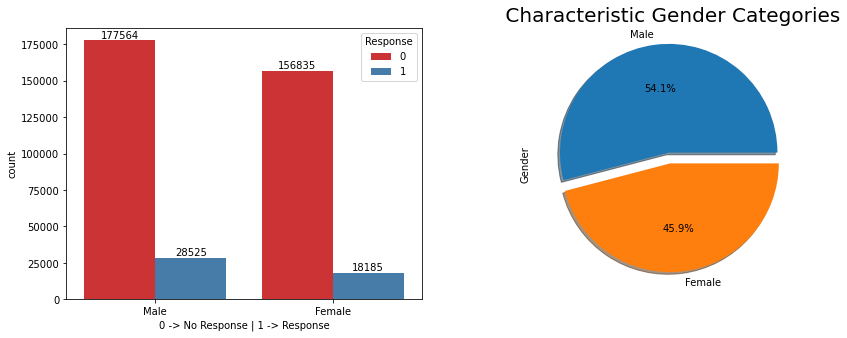

In [32]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Gender',data=Insurance,hue='Response',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No Response | 1 -> Response")
Insurance.Gender.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title(" 0 -> No Response | 1 -> Response")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Gender Categories",fontsize = 20)

In [33]:
pd.crosstab(Insurance['Gender'],Insurance['Response'])

Response,0,1
Gender,,
Female,156835,18185
Male,177564,28525


Text(0.5, 1.0, ' Characteristic Gender Categories')

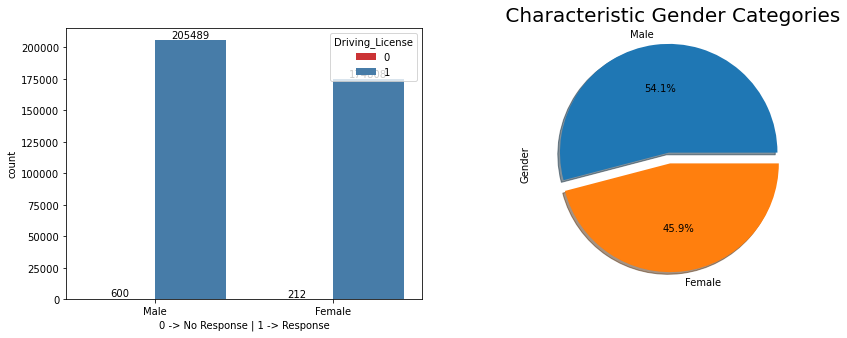

In [34]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Gender',data=Insurance,hue='Driving_License',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No Response | 1 -> Response")
Insurance.Gender.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title(" 0 -> No Response | 1 -> Response")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Gender Categories",fontsize = 20)

In [35]:
pd.crosstab(Insurance['Gender'],Insurance['Driving_License'])

Driving_License,0,1
Gender,,
Female,212,174808
Male,600,205489


**Insight**
- Most sample in insurance customer is male
- majority of sample data Gender: male has vehicle insurance and driving license
- Total Customer didn't have driving license 812 Customer

----

### 2. Age

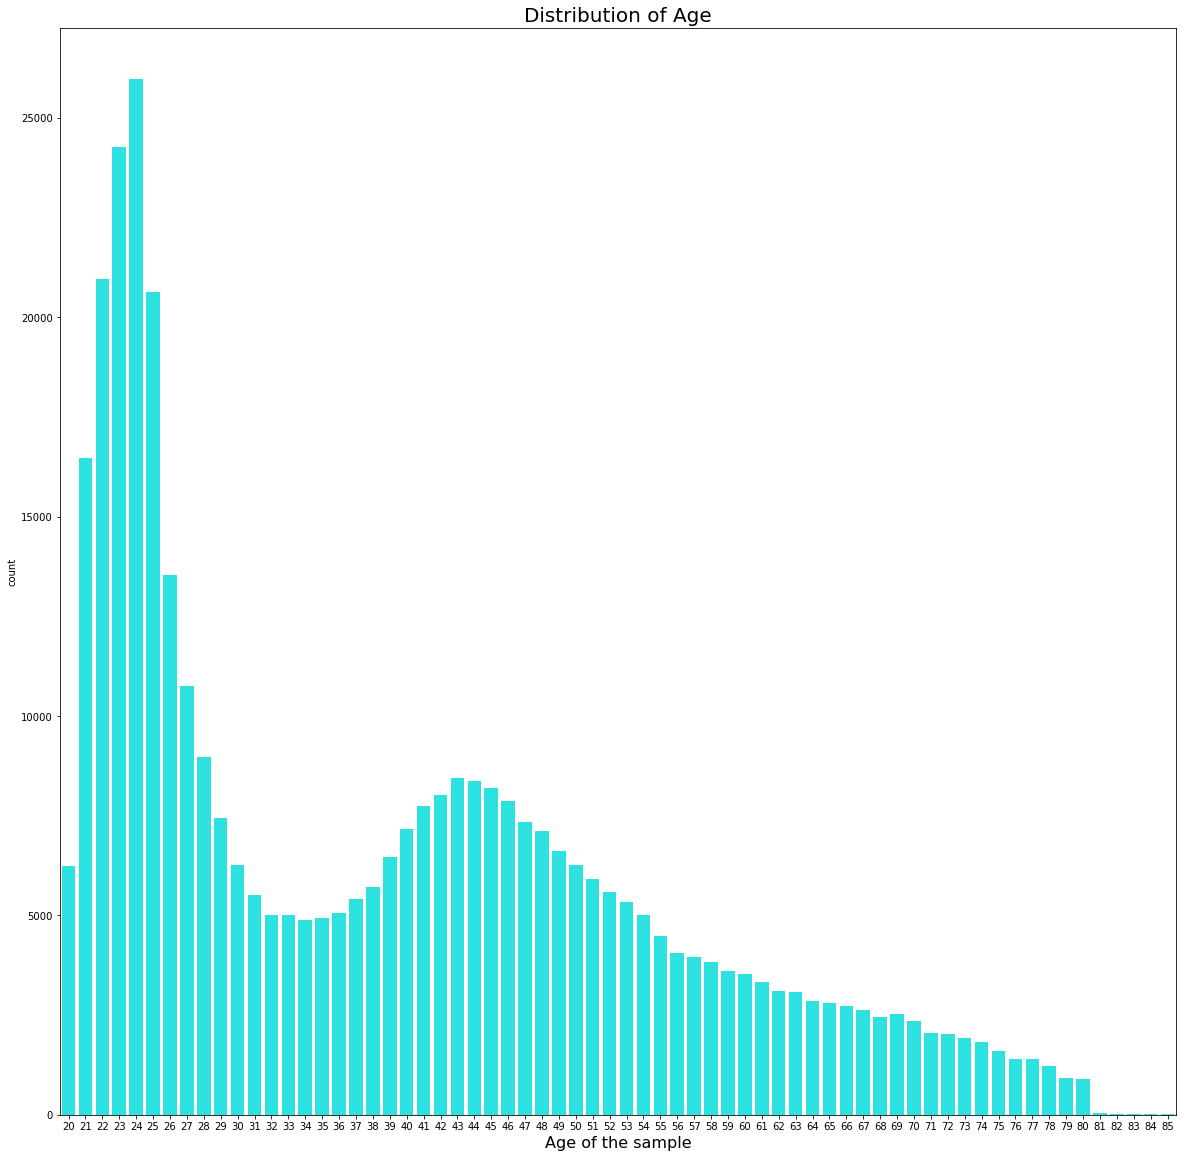

In [36]:
x = Insurance['Age']
plt.figure(figsize=(20,20))
ax = sns.countplot(x,color='#10ffff')
ax.set_xlabel(xlabel = 'Age of the sample', fontsize = 16)
ax.set_title(label = 'Distribution of Age', fontsize = 20)
plt.show()

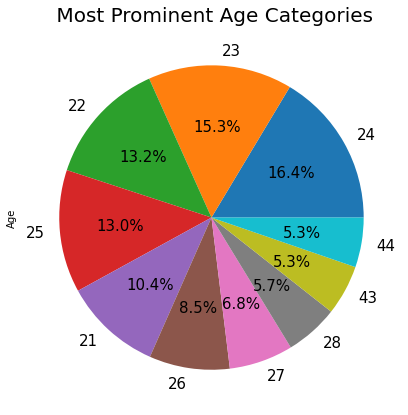

In [37]:
plt.figure(figsize=(7,7))
df = Insurance.Age.value_counts().to_frame()
textprops = {"fontsize":15}
df.head(10).Age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title(" Most Prominent Age Categories",fontsize = 20)
plt.show()

**Insight**

Most of the customers who register as insurance customers are 24 years old, followed by 23, 22, 25, 21 years old. representing 51.9 % of customers. Sample Population of Insurance Customer domination by Young Adult (20-25 years old)

----

### 3. Driving License

Text(0.5, 1.0, ' Characteristic Damage and driving license Categories')

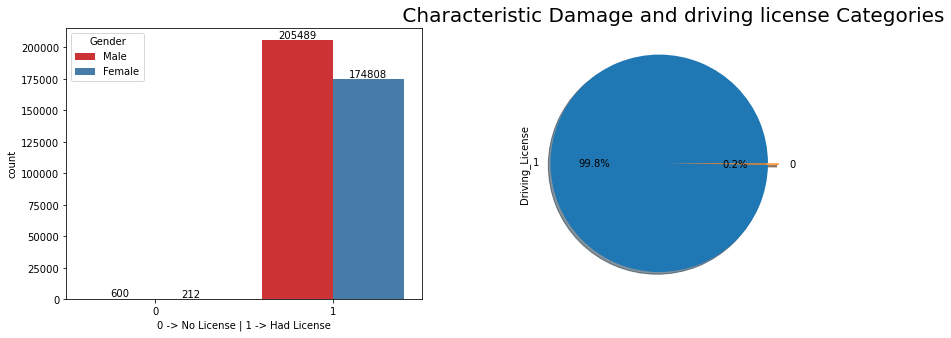

In [38]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Driving_License',data=Insurance,hue='Gender',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No License | 1 -> Had License")
Insurance.Driving_License.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0])
ax[1].set_title("0 -> No | 1 -> Yes")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Damage and driving license Categories",fontsize = 20)

In [39]:
pd.crosstab(Insurance['Driving_License'],Insurance['Gender'])

Gender,Female,Male
Driving_License,,
0,212,600
1,174808,205489


Text(0.5, 1.0, ' Characteristic Driving License Categories')

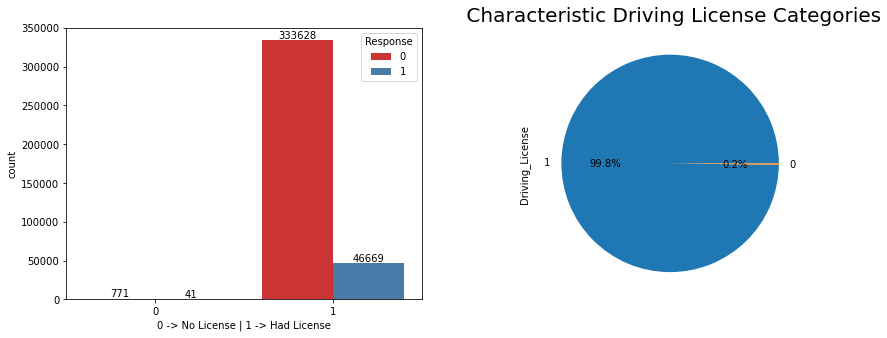

In [40]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Driving_License',data=Insurance,hue='Response',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No License | 1 -> Had License")
Insurance.Driving_License.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("0 -> No | 1 -> Yes")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Driving License Categories",fontsize = 20)

In [41]:
pd.crosstab(Insurance['Driving_License'],Insurance['Response'])

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


**Insight**
- 99,8 % Customer had driving license
- Majority Customer who had driving license not interest in vehicle insurance
- but Customer who doesn't have driving license 41 Customer interest in vehicle insurance

----

### 4. Vehicle Damage

Text(0.5, 1.0, ' Characteristic Vehicle Damage and Previously Insured Categories')

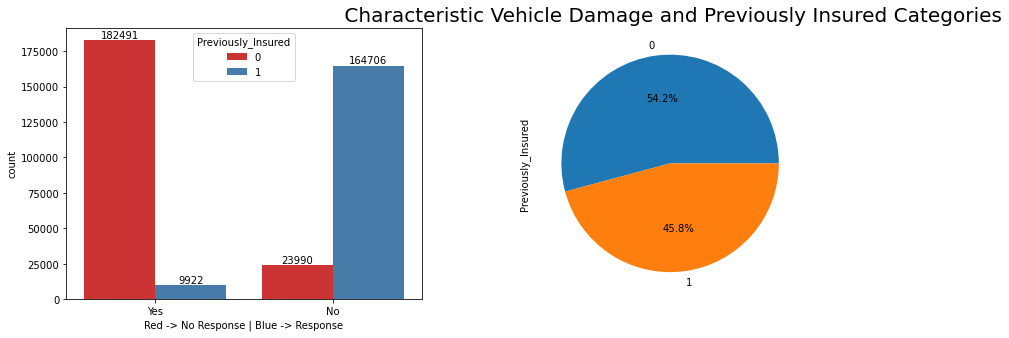

In [42]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Vehicle_Damage',data=Insurance,hue='Previously_Insured',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> No Response | Blue -> Response")
Insurance.Previously_Insured.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("0 -> No | 1 -> Yes")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Vehicle Damage and Previously Insured Categories",fontsize = 20)

In [43]:
pd.crosstab(Insurance['Vehicle_Damage'],Insurance['Previously_Insured'])

Previously_Insured,0,1
Vehicle_Damage,,
No,23990,164706
Yes,182491,9922


**Insight**
- Majority in data sample represent 54,2 % Customer didn't insure their vehicle
- Majoririty Customer who had vehicle damage didn't insurance their vehicle

----

### 5. Vehicle Age

Text(0.5, 1.0, ' Characteristic Vehicle Age')

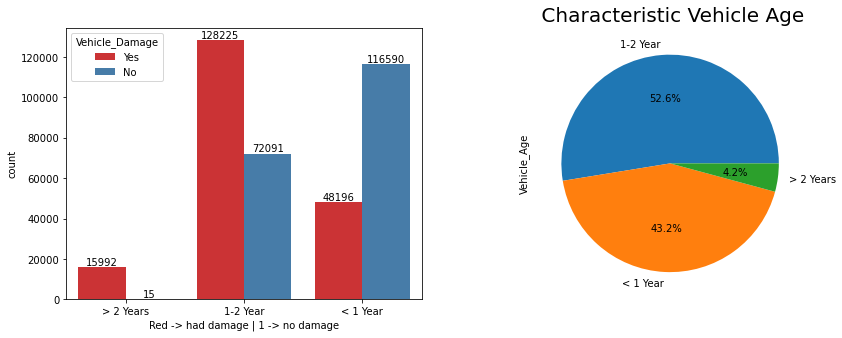

In [44]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Vehicle_Age',data=Insurance,hue='Vehicle_Damage',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Red -> had damage | 1 -> no damage")
Insurance.Vehicle_Age.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("0 -> No | 1 -> Yes")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Vehicle Age",fontsize = 20)

**Insight**
- Vehicle Age 1-2, had insured their vehicle
- 116.590 Customer who had vehicle age < 1 don't insured their vehicle
- Majority customer have vehicle with age 1-2 year by 52,6 % of the sample dataset

Text(0.5, 1.0, ' Characteristic Vehicle Age between Previosly insured')

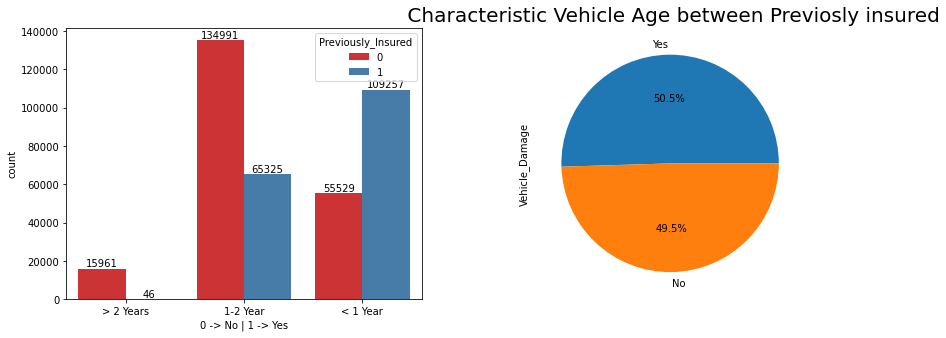

In [45]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Vehicle_Age',data=Insurance,hue='Previously_Insured',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 -> No | 1 -> Yes")
Insurance.Vehicle_Damage.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[1].set_title("0 -> No | 1 -> Yes")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.title(" Characteristic Vehicle Age between Previosly insured",fontsize = 20)

**Insight**
- Vehicle Age >2 didn't ever using insurance service
- Majority Customer who had vehicle age <1, insurance their vehicle
- Majority customer have vehicle with age 1-2 year by 52,6 % of the sample dataset
- 50.5 % Customer had damage with their vehicle

----

### 6. Region & Sales Channel

#### Region Code

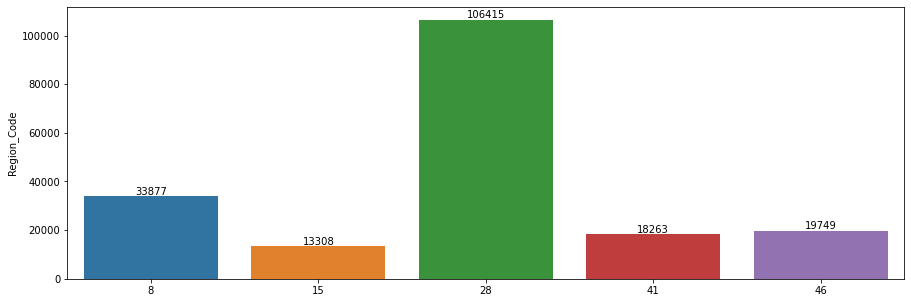

In [46]:
# Top 5 regions with highest number of insurers
labels= Insurance['Region_Code'].value_counts()[:5].keys()
values= Insurance['Region_Code'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insight**

Region 28 is the area that has the most area, followed by Region 8, 46, 41, and 15

#### Sales Channel Policy

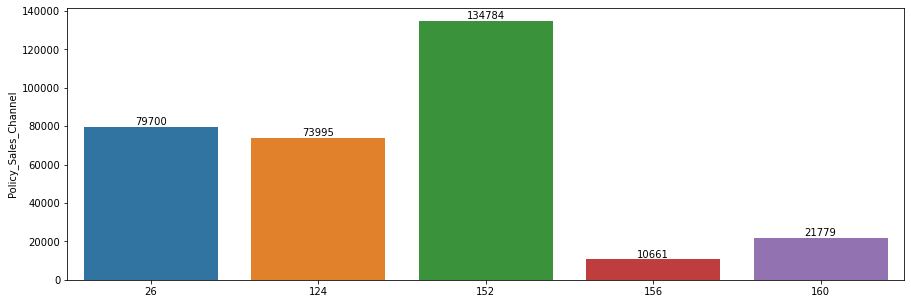

In [47]:
# Top 5 Sales Channel with highest number of insurers
labels= Insurance['Policy_Sales_Channel'].value_counts()[:5].keys()
values= Insurance['Policy_Sales_Channel'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insight**

Sales Channel 152 is the area that has the most effective channel, followed by channel 26, 124, 160, and 156

------

#### Respon Comparison between Region and Sales Channel value

------

In [48]:
resp_yes = Insurance[Insurance['Response']== 1]
resp_no = Insurance[Insurance['Response']== 0]

**Region**

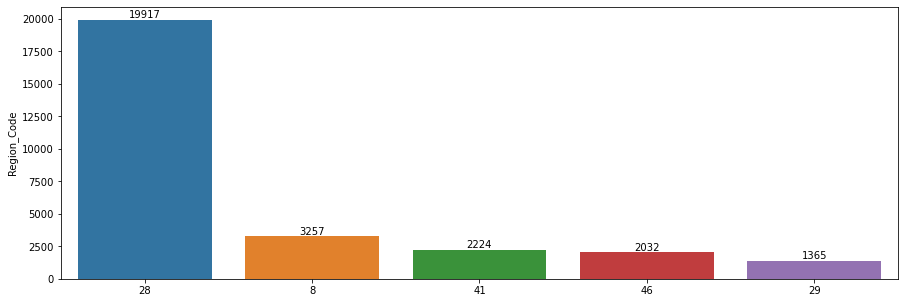

In [49]:
labels= resp_yes['Region_Code'].value_counts()[:5].keys()
values= resp_yes['Region_Code'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=resp_yes['Region_Code'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

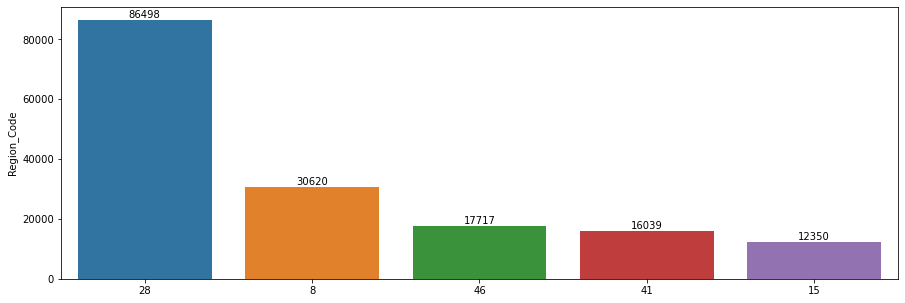

In [50]:
labels= resp_no['Region_Code'].value_counts()[:5].keys()
values= resp_no['Region_Code'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=resp_no['Region_Code'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insight**
- Region code 28 had 19,917 customers who insure their vehicle, and the rest 86,498 customer doesn't insurance their vehicle
- Region 8, 46, 41, and 15 can be potential sales penetration to market the vehicle insurance to increase that revenue in Vehicle Insurance

------

**Sales Channel**

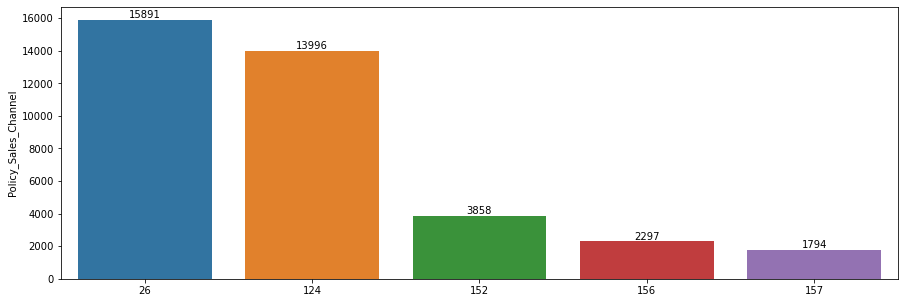

In [51]:
labels= resp_yes['Policy_Sales_Channel'].value_counts()[:5].keys()
values= resp_yes['Policy_Sales_Channel'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=resp_yes['Policy_Sales_Channel'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

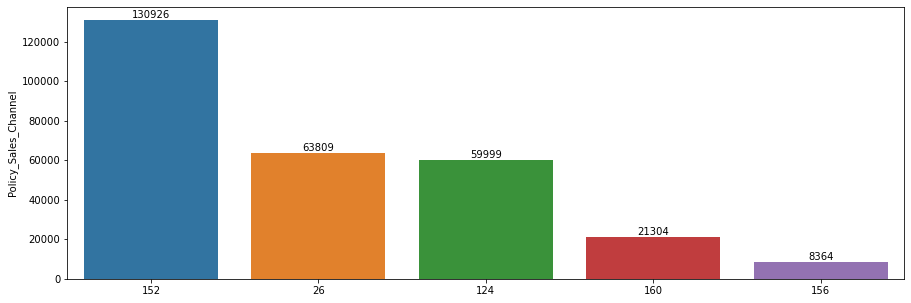

In [52]:
labels= resp_no['Policy_Sales_Channel'].value_counts()[:5].keys()
values= resp_no['Policy_Sales_Channel'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=resp_no['Policy_Sales_Channel'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insight**
- Sales Channel 152 is the most effective channel to marketed the insurance, but on sells vehicle insurance is'nt effective
- Sales Channel 26 and 124 the most effective channle to marketed vehicle insurance, total had 29,887 customers sells the vehicle insurance

----

### 7. Annual Premium & Vintage

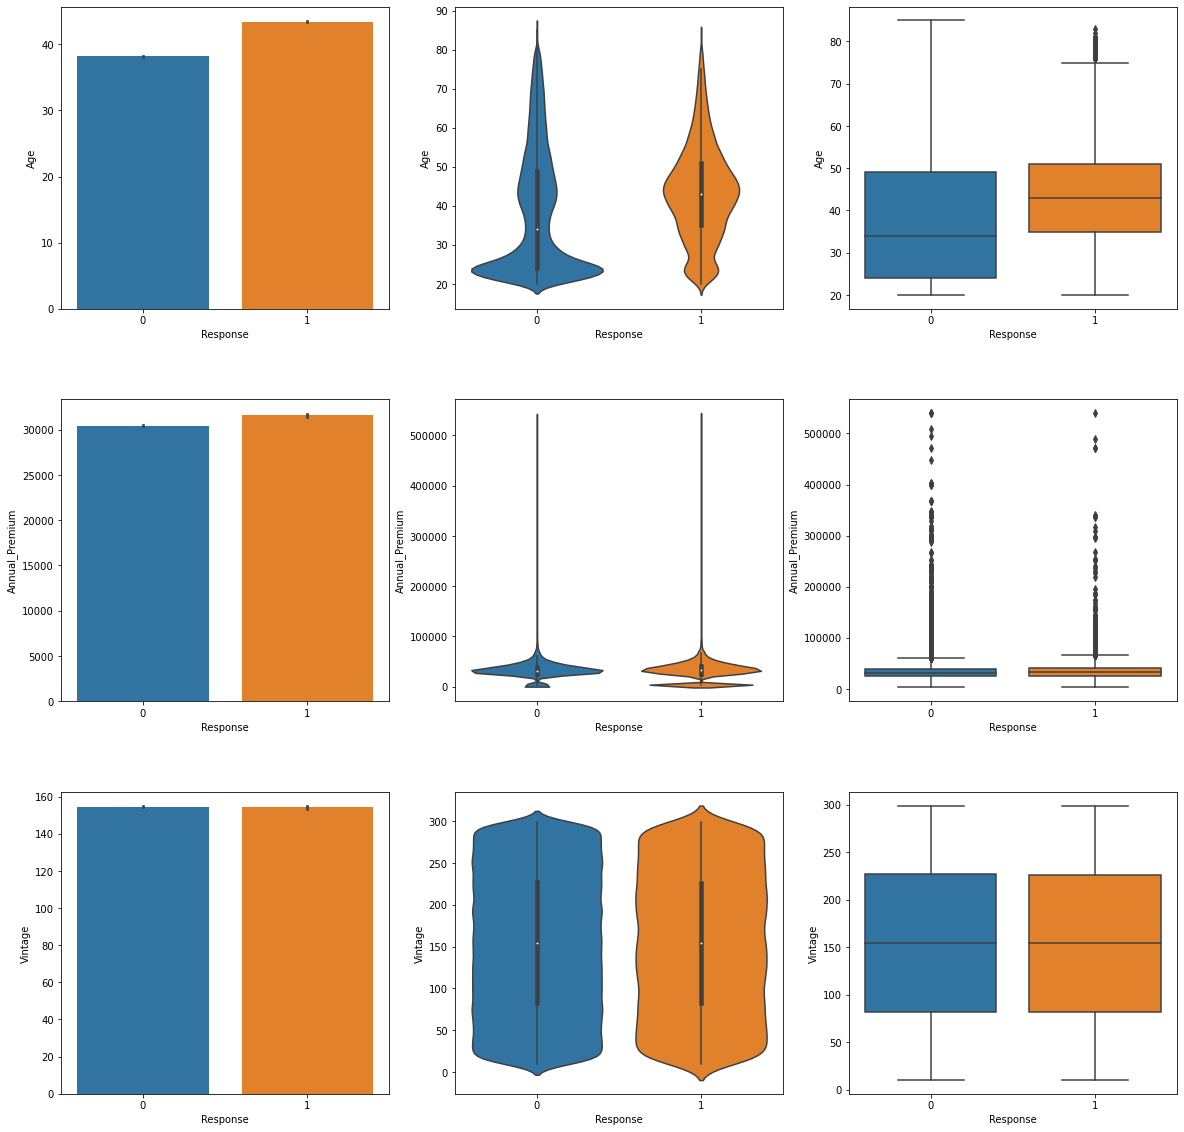

In [53]:
fig, axes = plt.subplots(nrows=3,ncols=3,  figsize=(20,20))
fig.subplots_adjust(hspace = .3, wspace=.2)
x = ['Age','Annual_Premium','Vintage']
for i in range(0,len(x)):
    sns.barplot(Insurance['Response'],Insurance[x[i]],ax=axes[i][0])
    sns.violinplot(Insurance['Response'],Insurance[x[i]],ax=axes[i][1])
    sns.boxplot(Insurance['Response'],Insurance[x[i]],ax=axes[i][2])

**Insight**
- Customers who are interested in vehicle insurance have a higher age group
- Annual premiums for both groups are similar to those of interested persons with slightly higher average annual premiums
- There is no significant number of days the insurance company is associated with the company, the distribution is the same regardless of the response

#### Annual Premium

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

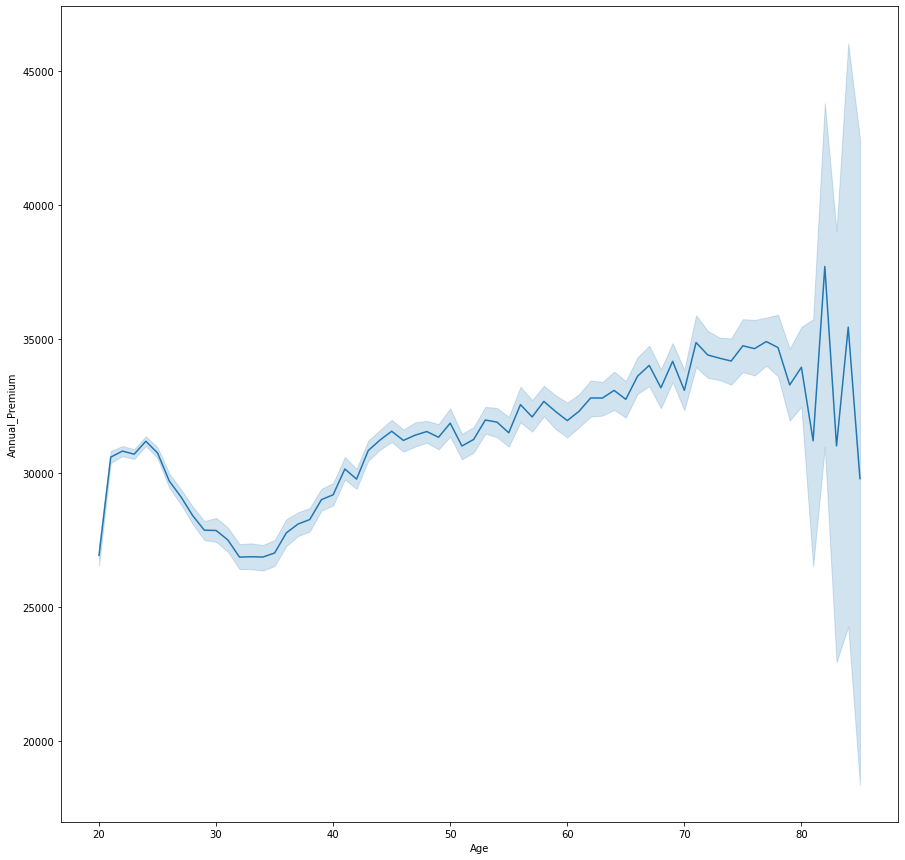

In [54]:
plt.figure(figsize=(15,15))
sns.lineplot(Insurance["Age"],Insurance["Annual_Premium"])

**Insight**

Age and premium are sure to have a relationship as we can see that with the increase in age the premium increases. The lowest premium is of the age group range of 20-40 and there is a rise in premium after 50 and a steady rise till 80 where there are peaks of the premium. Premium and age are a very important factors when it comes to analyzing insurance data

#### Vintage

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

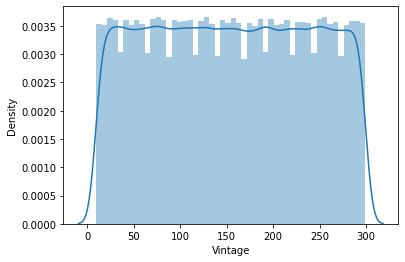

In [55]:
sns.distplot(Insurance.Vintage)

*Distribution on Vintage feauture is looking normal*

---------

---------

# Data Pre-Processing

---------

## Missing Values

In [57]:
Insurance.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

*data has no null values*

## Duplicated Data

In [58]:
if Insurance.duplicated().sum() == 0:
    print('There is no duplicated data')
else:
    print('There are duplicated data: ', data.duplicated().sum())

There is no duplicated data


In [59]:
duplicate = Insurance.duplicated()
duplicate.sum()

0

In [60]:
Insurance.drop_duplicates(inplace=True)
Insurance.shape

(381109, 12)

## Outliers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

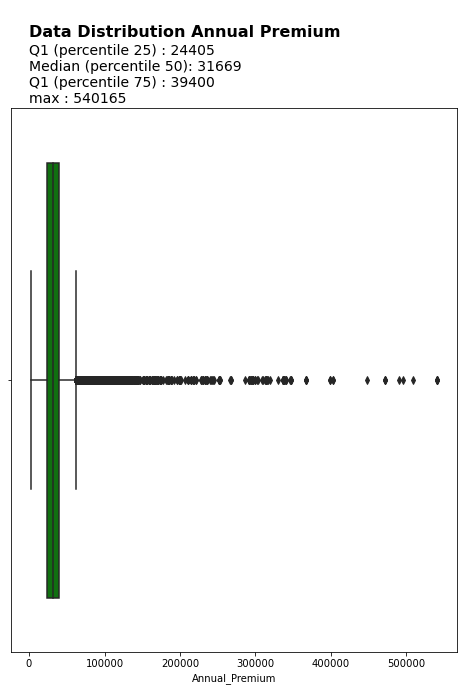

In [61]:
fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(Insurance['Annual_Premium'],color='green',orient='h')

title = '''
Data Distribution Annual Premium
'''
ax.text(10,-0.6,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')

text = '''
Q1 (percentile 25) : 24405
Median (percentile 50): 31669
Q1 (percentile 75) : 39400
max : 540165

'''
ax.text(9,-0.45,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.tight_layout

### Log Transform Annual Premium

In [62]:
Q1 = Insurance['Annual_Premium'].quantile(0.25)
Q3 = Insurance['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers:')
((Insurance['Annual_Premium'] < (lower_range)) | (Insurance['Annual_Premium'] > (upper_range))).sum()

Number of Outliers:


10320

In [63]:
((((Insurance['Annual_Premium'] < (lower_range)) | (Insurance['Annual_Premium'] > (upper_range))).sum())/Insurance.shape[0])*100

2.70788672007221

In [64]:
print('Upper Range: {}\nLower Range:{}'.format(upper_range,lower_range))

Upper Range: 61892.5
Lower Range:1912.5


In [65]:
Q1 = Insurance['Annual_Premium'].quantile(0.25)
Q3 = Insurance['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
High_limit = Q3 + (1.5 * IQR)
filtered_entries = ((Insurance['Annual_Premium'] >= low_limit) & (Insurance['Annual_Premium'] <= High_limit))
Insurance = Insurance[filtered_entries]

Text(0.5, 0, '')

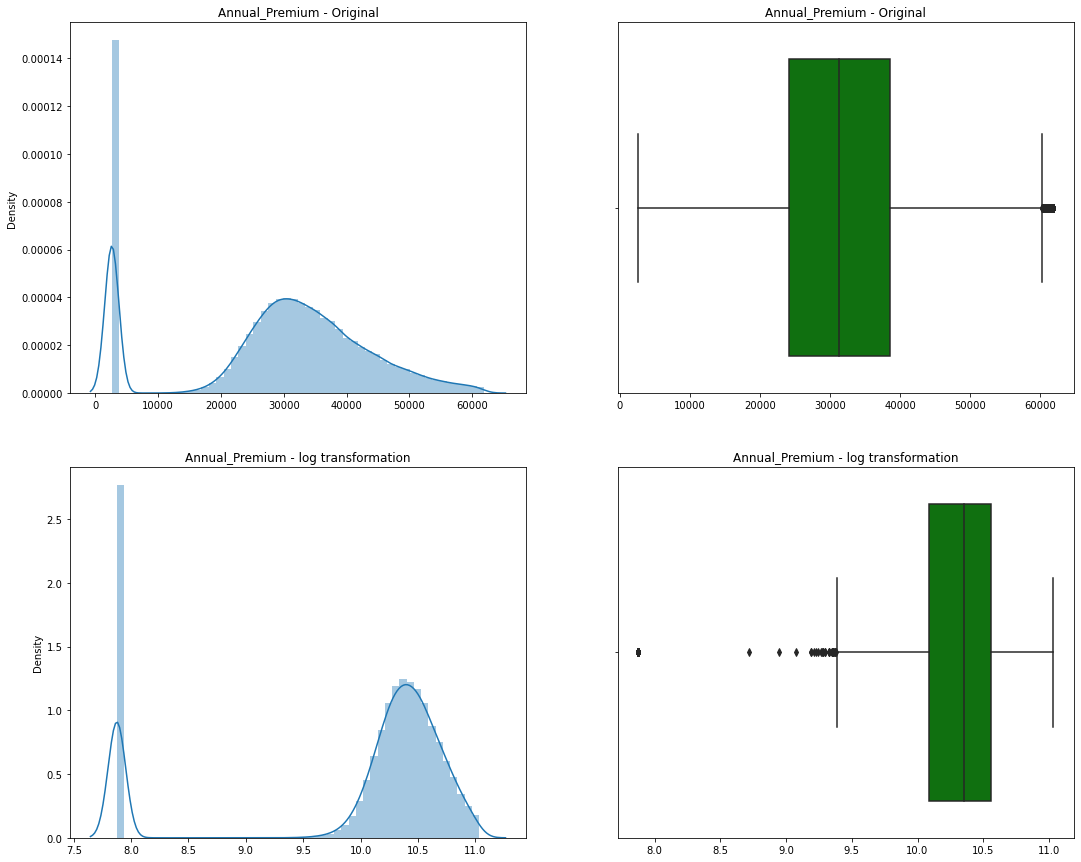

In [66]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(Insurance['Annual_Premium'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Annual_Premium - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(Insurance['Annual_Premium'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Annual_Premium - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(Insurance['Annual_Premium']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Annual_Premium - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(Insurance['Annual_Premium']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Annual_Premium - log transformation')
ax[1,1].set_xlabel('')

In [67]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370789 non-null  int64  
 1   Gender                370789 non-null  object 
 2   Age                   370789 non-null  int64  
 3   Driving_License       370789 non-null  int64  
 4   Region_Code           370789 non-null  int32  
 5   Previously_Insured    370789 non-null  int64  
 6   Vehicle_Age           370789 non-null  object 
 7   Vehicle_Damage        370789 non-null  object 
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  370789 non-null  int32  
 10  Vintage               370789 non-null  int64  
 11  Response              370789 non-null  int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 32.5+ MB


----

----

# Feature Encoding

### Vintage

***Change Row in Vintage Feature from days to month***


*Then group them into 3 groups based on month, to find out customer loyalty..*

### Annual Premium

*Categorizing Annual Premium became 4 kind category. Low , Medium, High, and Priority*

In [68]:
premi_cat = []

for i, k in Insurance.iterrows():
    low = k['Annual_Premium'] <=15000.0
    medium = k['Annual_Premium'] > 15000.0 and k['Annual_Premium'] <= 30000.0
    high = k['Annual_Premium'] > 30000.0 and k['Annual_Premium'] <= 60000.0
    priority = k['Annual_Premium'] > 60000.0
    
    if low:
      premi_cat.append('low')
    elif medium:
      premi_cat.append('medium')
    elif high:
      premi_cat.append('high')
    else:
      premi_cat.append('priority')
Insurance['premi_status'] = premi_cat
Insurance.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premi_status
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1,high
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0,high


---

## Label Encoding

In [69]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(Insurance['Gender'])
Insurance
Insurance['Vehicle_Age_num'] = Insurance['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})

le.fit(Insurance['Vehicle_Damage'])
Insurance['Vehicle_Damage_num'] = le.transform(Insurance['Vehicle_Damage']) 

Insurance['premi_status_num'] = Insurance['premi_status'].map({'low':0, 'medium':1, 'high':2, 'priority':3})

Insurance.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premi_status,Vehicle_Age_num,Vehicle_Damage_num,premi_status_num
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1,high,2,1,2
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0,high,1,0,2
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1,high,2,1,2
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0,medium,0,0,1
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0,medium,0,0,1


## One Hot Encoding

Do *One Hot Encoding* in Gender, Previously Insure, Vehicle Damage and Vehicle Age

In [70]:
Insurance['Gender'] = Insurance['Gender'].fillna(Insurance['Gender'].mode()[0])
dummies_Gender = pd.get_dummies(Insurance['Gender'],prefix='Gender')
Insurance = pd.concat([Insurance, dummies_Gender], axis=1)

Insurance['Previously_Insured'] = Insurance['Previously_Insured'].fillna(Insurance['Previously_Insured'].mode()[0])
dummies_prev_insured = pd.get_dummies(Insurance['Previously_Insured'],prefix='Previously_Insured')
Insurance = pd.concat([Insurance, dummies_prev_insured], axis=1)

Insurance['Vehicle_Damage'] = Insurance['Vehicle_Damage'].fillna(Insurance['Vehicle_Damage'].mode()[0])
dummies_damage = pd.get_dummies(Insurance['Vehicle_Damage'],prefix='Damage')
Insurance = pd.concat([Insurance, dummies_damage], axis=1)

Insurance['Vehicle_Age'] = Insurance['Vehicle_Age'].fillna(Insurance['Vehicle_Age'].mode()[0])
dummies_vehicle_age = pd.get_dummies(Insurance['Vehicle_Age'],prefix='Vehicle_Age_num')
Insurance = pd.concat([Insurance, dummies_vehicle_age], axis=1)

Insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,premi_status_num,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Damage_No,Damage_Yes,Vehicle_Age_num_1-2 Year,Vehicle_Age_num_< 1 Year,Vehicle_Age_num_> 2 Years
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,...,2,0,1,1,0,0,1,0,0,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,...,2,0,1,1,0,1,0,1,0,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,...,2,0,1,1,0,0,1,0,0,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,...,1,0,1,0,1,1,0,0,1,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,...,1,1,0,0,1,1,0,0,1,0


In [71]:
Insurance.info()
Insurance.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         370789 non-null  int64  
 1   Gender                     370789 non-null  object 
 2   Age                        370789 non-null  int64  
 3   Driving_License            370789 non-null  int64  
 4   Region_Code                370789 non-null  int32  
 5   Previously_Insured         370789 non-null  int64  
 6   Vehicle_Age                370789 non-null  object 
 7   Vehicle_Damage             370789 non-null  object 
 8   Annual_Premium             370789 non-null  float64
 9   Policy_Sales_Channel       370789 non-null  int32  
 10  Vintage                    370789 non-null  int64  
 11  Response                   370789 non-null  int32  
 12  premi_status               370789 non-null  object 
 13  Vehicle_Age_num            37

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'premi_status',
       'Vehicle_Age_num', 'Vehicle_Damage_num', 'premi_status_num',
       'Gender_Female', 'Gender_Male', 'Previously_Insured_0',
       'Previously_Insured_1', 'Damage_No', 'Damage_Yes',
       'Vehicle_Age_num_1-2 Year', 'Vehicle_Age_num_< 1 Year',
       'Vehicle_Age_num_> 2 Years'],
      dtype='object')

---

---

# Feature Selection

In [73]:
Insurance.drop(['id','Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
           'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'premi_status',
           'Vehicle_Age_num', 'Vehicle_Damage_num'],axis=1,inplace=True)

Insurance.head(3)

,Age,Region_Code,Policy_Sales_Channel,Response,premi_status_num,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Damage_No,Damage_Yes,Vehicle_Age_num_1-2 Year,Vehicle_Age_num_< 1 Year,Vehicle_Age_num_> 2 Years
0,44,28,26,1,2,0,1,1,0,0,1,0,0,1
1,76,3,26,0,2,0,1,1,0,1,0,1,0,0
2,47,28,26,1,2,0,1,1,0,0,1,0,0,1


In [74]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Age                        370789 non-null  int64
 1   Region_Code                370789 non-null  int32
 2   Policy_Sales_Channel       370789 non-null  int32
 3   Response                   370789 non-null  int32
 4   premi_status_num           370789 non-null  int64
 5   Gender_Female              370789 non-null  uint8
 6   Gender_Male                370789 non-null  uint8
 7   Previously_Insured_0       370789 non-null  uint8
 8   Previously_Insured_1       370789 non-null  uint8
 9   Damage_No                  370789 non-null  uint8
 10  Damage_Yes                 370789 non-null  uint8
 11  Vehicle_Age_num_1-2 Year   370789 non-null  uint8
 12  Vehicle_Age_num_< 1 Year   370789 non-null  uint8
 13  Vehicle_Age_num_> 2 Years  370789 non-null  uint8
dtypes: i

In [75]:
Insurance.shape

(370789, 14)

### Train test split

In [76]:
data_train = Insurance.iloc[:370789,]
data_test = Insurance.iloc[370789:,]

*the data above is not balanced, it is necessary to do an imbalance oversampling*

In [77]:
from imblearn import over_sampling

X = data_train.drop(['Response'],axis=1)
y = data_train['Response']

# Oversampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

***Splitting the dataset into train and test datasets, 80% Train Data + 20 % Test Data***

In [78]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X_over,
                                              y_over,
                                            test_size = 0.2,
                                           random_state = 10)

X_train.shape, X_test.shape

((521014, 13), (130254, 13))

-----

-----

# Machine Learning

-----

### Machine Learning Model

Model Machine Learning using  **Classification type**, including ***K-Nearest Neighbors , Desicion Tree, Random Forest*** to formulation the Machine learning modelling scores to fit with Insurance data

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


def models(models):
  results = pd.DataFrame({'accuracy_train':[],'accuracy_test':[],
                          'recall_train':[], 'recall_test':[],
                          'precision_train':[],'precision_test':[],
                          'AUC_train': [], 'AUC_test': [], 
                          'f1_score_train':[], 'f1_score_test':[]})
  

  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    results = results.append({'accuracy_train': accuracy_score(y_train, model.predict(X_train)),
                              'accuracy_test': accuracy_score(y_test, model.predict(X_test)),
                              'recall_train': recall_score(y_train, model.predict(X_train), average='macro'),
                              'recall_test': recall_score(y_test, model.predict(X_test), average='macro'),
                              'precision_train': precision_score(y_train, model.predict(X_train), average='macro'),
                              'precision_test': precision_score(y_test, model.predict(X_test), average='macro'),
                              'AUC_train': roc_auc_score(y_train, model.predict(X_train)),
                              'AUC_test': roc_auc_score(y_test, model.predict(X_test)),
                              'f1_score_train': metrics.f1_score(y_train, model.predict(X_train)),
                              'f1_score_test':  metrics.f1_score(y_test, model.predict(X_test))
                              }, ignore_index=True)
    

   
  
  results['model'] = ['KNN','Decision Tree', 'Random Forest']
  return results

In [81]:
%%time
models([KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier()])

Wall time: 26min 35s


,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,AUC_train,AUC_test,f1_score_train,f1_score_test,model
0,0.844325,0.819061,0.844344,0.818972,0.856065,0.833373,0.844344,0.818972,0.857259,0.836158,KNN
1,0.884928,0.859528,0.884945,0.859448,0.894815,0.872368,0.884945,0.859448,0.893348,0.871547,Decision Tree
2,0.884922,0.860404,0.884940,0.860320,0.895783,0.874696,0.884940,0.860320,0.893708,0.872906,Random Forest


The three models used between *K-Nearest Neighbors, Decision tree, and Random Forest*. The algorithm model that has the best value is **Random forest** because *the precision and F1 Score of the train/test sample score more significant*. Author uses **Random Forest** to follow up the Evaluation step

### Evaluation

**Random Forest Algorithm**

In [82]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

##### Cross Validation

In [83]:
scores = cross_val_score(rf, X_train, y_train, cv=3)
print('Cross-Validation Accuracy Scores', scores)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores [0.85208324 0.85082714 0.85184631]
Cross-Validation Accuracy Scores 0.8515855610450461


***Cross-Validation Accuracy with 3 k-fold, CV Scores is 0.8515 or 85.15 %***

##### Hyperparamater Tuning

In [84]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

param_grid = [{'criterion':['gini'],'n_estimators': [5, 25, 50], 'max_features': ['auto'], 
'max_depth': [10,20,30],'min_samples_split':[8, 16, 32], 'min_samples_leaf':[4, 16, 32], 'bootstrap': [True, False]}]

rf = RandomForestClassifier(random_state=10)

grid_search_forest = GridSearchCV(rf, param_grid, cv=3)
grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_estimator_

Wall time: 2h 37min 1s


RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=50, random_state=10)

##### after tuning hyperparameter

In [85]:
rf = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=50, random_state=10)

rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[48080 16991]
 [ 3426 61757]]


Accuracy of Random Forest: 84.32524145131819 

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     65071
           1       0.78      0.95      0.86     65183

    accuracy                           0.84    130254
   macro avg       0.86      0.84      0.84    130254
weighted avg       0.86      0.84      0.84    130254



After tuning the Hyperparameter, the **Random Forest Algorithm's** accuracy value is **84.32%**. 

-----------------

## Feature Importance

Text(0.5, 1.0, 'feature importance score')

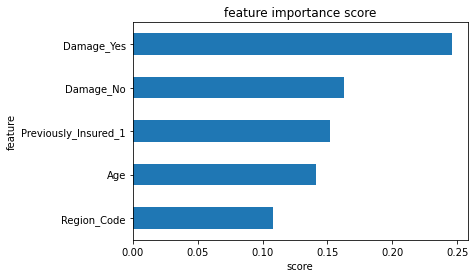

In [87]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(5).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In Feature Importance that affect Cross Sell  Insurance including: 

- Vehicle Damage
- Previously Insure: Yes
- Age of Customer
- Region Code


-----------------

## Permutation Importance

In [88]:
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(grid_search_forest.best_estimator_, random_state=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.to_list())

Weight,Feature
0.1169 ± 0.0015,Policy_Sales_Channel
0.1107 ± 0.0013,Age
0.0855 ± 0.0007,Previously_Insured_1
0.0795 ± 0.0016,Region_Code
0.0667 ± 0.0014,Damage_Yes
0.0549 ± 0.0011,Previously_Insured_0
0.0516 ± 0.0007,premi_status_num
0.0425 ± 0.0009,Damage_No
0.0161 ± 0.0005,Vehicle_Age_num_1-2 Year
0.0151 ± 0.0009,Gender_Female


In Permutation Imporatance method, the influential feauture in Cross sell Insurance sligthly different from Feature Importance.
Permutation Importance found with the highest weight of each feature in the dataset on Cross Sell Insurance, are as follows:
- Policy Sales Channel
- Age
- Previously Insure 1 (Yes)
- Region Code
- Vehicle Damage (Yes)
- Previously Insure 1 (Yes)
- Premis status ( Base on size of Annual Premium
- Vehicle Damage (No)

Conclusion in above method. **Policy Sales Channel and Age are the most important feature on Selling Insurance Service**

-----------------

----

# Summary and Recommendation

Dataset is known to be unbalanced (oversampling), the author performs an imbalance oversampling treatment for effectively run machine learning algorithm.The results of research conducted to predict heart disease and its causes. from the modeling carried out including *K-Nearest Neighbors, Decision Tree, and Random Forest*. The modeling results above show that ***Random Forest*** has the most significant accuracy of all the modeling algorithms with , and average Cross Validation with 3 Folds have scores **85.15%**. 

Next, the authors carry out further evaluations using ***Random Forest*** with Randomize search CV hyperparameter tuning with instrument *<i>bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=10<b>*. After Hyperparamater tuning the Random Forest Accuracy became **84.32%**, with Confussion Matrix Value in data train 48.080 with response yes and 3.426 with Response No. In data test 16.991 with response yes, and 61.757 with response no.
 
In predicting and knowing the cause of Cross sell insurance by the existing sample data with using the ***Permutation Importance*** methods, conclusion from the entire sample it shows ***Policy Sales Channel ,Age, Previously Insure 1 (Yes), Region Code, Vehicle Damage (Yes), Previously Insure 1 (Yes), Premis status ( Base on size of Annual Premium)Vehicle Damage (No)*** which are influential factors Upselling the Vehicle Insurance Service

For recommendations, The Executetive Insurance Company should consider these 8 influential variables early so that the selling Vehicle Insurance service to Customer more effective and efficient. For example, re-offering customer with Sales Channel Policy that effective to sells vehicle insurance, and expanding to the Region area which have the most customer who didn't have Insurance. with unique and creative promotion or benefit to prospective customer sells their insurance service

------

------